# <center> Analysis of Average State Temperature (F) and Homeless Population
    This analysis aims to investigate the potential relationship between the average temperature of a given state within the US and the homeless population, per capita, of the corresponding state.

In [1]:
#set dependancies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
#%pwd

In [2]:
#paths to csv files
homeless_data = ("Homeless Population by State.csv")
weather_data = ("weather.csv")
#read csv files
homeless_data=pd.read_csv(homeless_data)
weather_data=pd.read_csv(weather_data)
#merge csv files
homeless_weather=pd.merge(homeless_data, weather_data, how="outer", on=["State"])
homeless_weather.head()

,State,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,Unnamed: 0,Average Temp (F)
0,Alabama,3752,7.4,539,1270,2482,169,308,0.0,63.755000
1,Alaska,2320,31.7,576,560,1760,186,134,1.0,30.352143
2,Arizona,13553,18.6,2476,2846,10707,917,857,2.0,59.975949
3,Arkansas,2459,8.1,376,328,2131,251,92,3.0,61.046835
4,California,171521,43.7,57760,25538,145983,9590,10395,4.0,59.257534


# <center> Merged Data Reasoning
The following datasets will compare homelessness per capita to the average temperature of the corresponding US state. To include "total" homless population as opposed to "per capita", could result in skewed data.

In [3]:
#create df conatining pertinent information
data = {
    "State":homeless_weather["State"],
    "Total":homeless_weather["Total"],
    "Per10kResidents":homeless_weather["Per10kResidents"],
    "Average Temp (F)":homeless_weather["Average Temp (F)"]
}
homeless_weather_df = pd.DataFrame(data)
homeless_weather_df.head()

,State,Total,Per10kResidents,Average Temp (F)
0,Alabama,3752,7.4,63.755000
1,Alaska,2320,31.7,30.352143
2,Arizona,13553,18.6,59.975949
3,Arkansas,2459,8.1,61.046835
4,California,171521,43.7,59.257534


In [4]:
#remove "NaN" results (District of Columbia). Weather code didn't like DC
homeless_weather_df = homeless_weather_df.dropna()

# <center> Scatter Plot and Linear Regression of Data
    The charts below display the relationship between a US state's average temperature and the homeless population per capita.

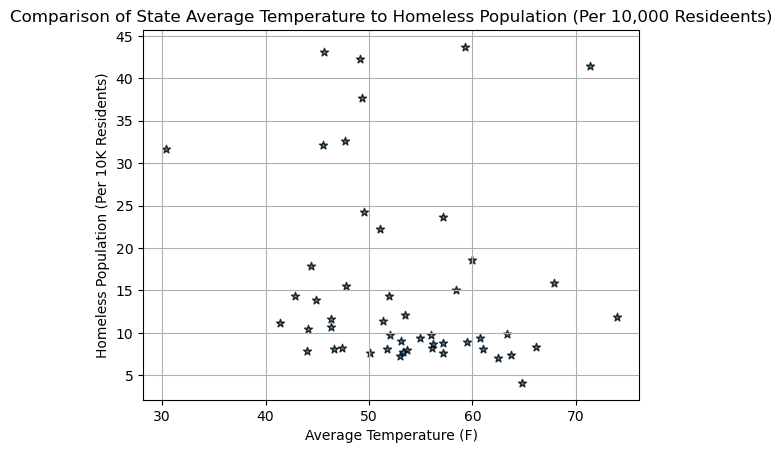

In [5]:
#create scatter plot to display data
plt.scatter(
    homeless_weather_df["Average Temp (F)"],
    homeless_weather_df["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="*",
    alpha=0.8
)

plt.title("Comparison of State Average Temperature to Homeless Population (Per 10,000 Resideents)")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Homeless Population (Per 10K Residents)")
plt.grid(True)
plt.show()

In [6]:
#line regression (correlation) code
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, marker="*")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="black")
    plt.xlabel("Average Temperature (F)")
    plt.ylabel(title)
    print(f"The r² value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r² value is: 0.029395602334835614
The r value is: -0.1714514576631987
The p value is: 0.23384166330533207


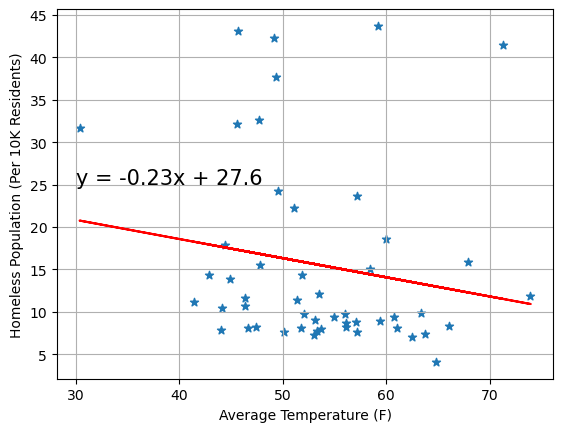

In [7]:
#correlation (or lack of) of data
x_values = homeless_weather_df["Average Temp (F)"]
y_values = homeless_weather_df["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Homeless Population (Per 10K Residents)", (30,25))

#
As the linear regression analysis shows, there is a negative correlation between a state's average temperature and it's homeless population per capita. This result suggests that, on average, states with a higher average temperature tend to have a lower homeless population per capita.

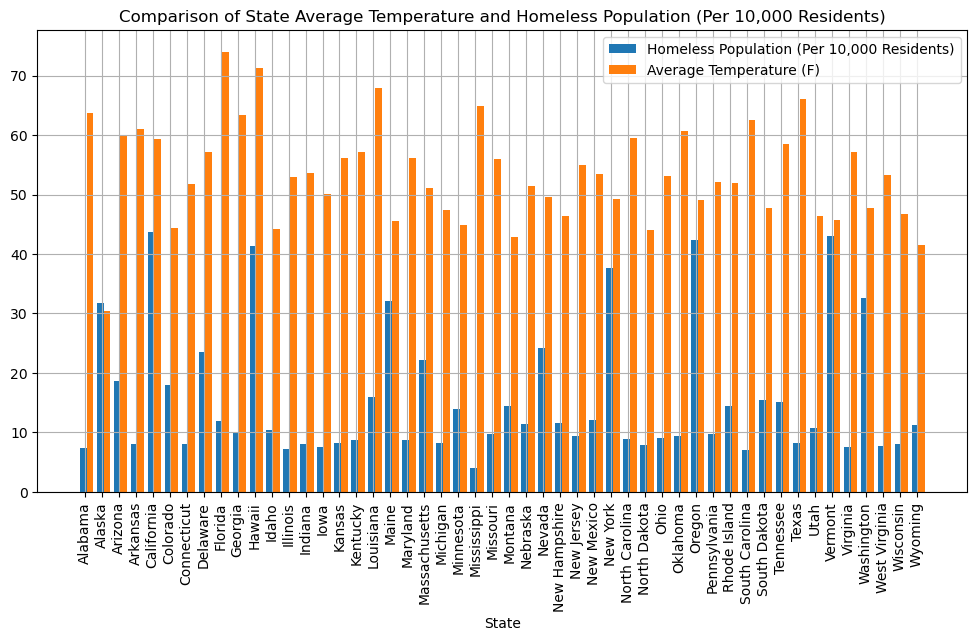

In [9]:
#is this too hard to read?
plt.figure(figsize=(12,6))
states=homeless_weather_df["State"]
x=range(len(states))
width=0.4

plt.bar(x, homeless_weather_df["Per10kResidents"], width, label = "Homeless Population (Per 10,000 Residents)")
plt.bar([i+width for i in x], homeless_weather_df["Average Temp (F)"], width, label = "Average Temperature (F)")
plt.title("Comparison of State Average Temperature and Homeless Population (Per 10,000 Residents)")
plt.xlabel("State")
plt.ylabel("")
plt.xticks([i+width/4 for i in x], states, rotation="vertical")
plt.legend()
plt.grid(True)
plt.show()

# <center> Conclusion
This analysis provides insight into the variation of average temperatures and homeless populations across the US states. The findings of this analysis do show a negative correlation between the two variables, but it is important to note that not all mitigating factors have been explored. Further investigation into severe climate instances, available housing, state-specific legislation, etc. would be needed to determine a comprehensive and conclusive result.